# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [1]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [2]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2

def imread(file_path):
    return cv2.imread(file_path)

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [3]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [4]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [5]:
img_path = "clock.png"

"""if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))"""

'if save_webcam_image(img_path) is False:\n    # Webcam not active, use the Dog Image\n    img_path = "rocking_chair.jpg"\n    print("Using the Test Rocking Chair Image: {}".format(img_path))'

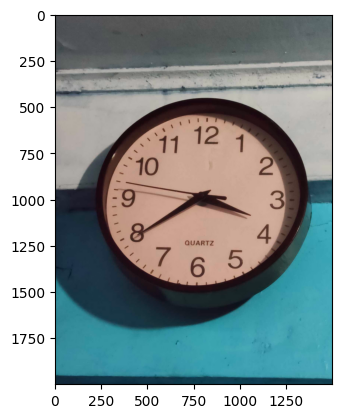

In [6]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [7]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Create a function to load model, image, preprocess input and targets

In [8]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [9]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 1s 774ms/step


,Predicted Class,Name,Probability
0,n04548280,wall_clock,0.878669
1,n02708093,analog_clock,0.119264
2,n02794156,barometer,0.001463
3,n03196217,digital_clock,0.000164
4,n04328186,stopwatch,0.000156
5,n03197337,digital_watch,0.000106
6,n03706229,magnetic_compass,0.000047
7,n03841143,odometer,0.000033
8,n04355338,sundial,0.000033
9,n04118776,rule,0.000013


Interpret the result of prediction using VGG16 model

### **Upon using the pre-trained VGG16 model, it resulted to a correct prediction of an object which is the wall clock at approximately 88% followed by the analog clock at almost 12%. The rest of the predictions with lesser probability are also quite similar or have the same characteristics with the object such as barometer, stopwatch, digital clock, etc. This shows that the model recognized well the image.**

Use Resnet50 pretrained model

In [10]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Predict the result

In [11]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n04548280,wall_clock,0.705200
1,n02708093,analog_clock,0.277381
2,n02794156,barometer,0.016747
3,n04328186,stopwatch,0.000324
4,n03841143,odometer,0.000071
5,n03196217,digital_clock,0.000031
6,n03706229,magnetic_compass,0.000026
7,n03259280,Dutch_oven,0.000020
8,n04355338,sundial,0.000019
9,n04118776,rule,0.000013


Interpret the result using RESNET50 pretrained model

### **Resnet50 have the same top predictions with VGG16, but at lower probability. It predicted the wall clock at 71% and analog clock at 28%. Comparing the predicted classes with the previous model, they almost have the same result. This indicates that Resnet50 also successfully predicted the object, but not as good as VGG16.**

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

In [12]:
from keras.applications import Xception
from keras.applications.xception import preprocess_input as xception_preprocess_input, decode_predictions as xception_decode_predictions

Xception_model = Xception(weights='imagenet')
Xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

In [13]:
predict_image(Xception_model, img_path, xception_preprocess_input, xception_decode_predictions, target_size=(299,299))

1/1 [==============================] - 2s 2s/step


,Predicted Class,Name,Probability
0,n04548280,wall_clock,0.589211
1,n02708093,analog_clock,0.313104
2,n02794156,barometer,0.002458
3,n03196217,digital_clock,0.001242
4,n03841143,odometer,0.001069
5,n02825657,bell_cote,0.001040
6,n04328186,stopwatch,0.000751
7,n06794110,street_sign,0.000677
8,n03187595,dial_telephone,0.000456
9,n04476259,tray,0.000437


### **Xception model with a total of 22.9M parameters resulted to a correct prediction of the object at almost 59% probability and analog clock at 31%. It has lower probability with the earlier models, but almost same result in the predicted classes.**

In [14]:
from keras.applications import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as InceptionResNetV2_preprocess_input, decode_predictions as InceptionResNetV2_decode_predictions

InceptionResNetV2_model = InceptionResNetV2(weights='imagenet')
InceptionResNetV2_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 149, 149, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_norm

In [15]:
predict_image(InceptionResNetV2_model, img_path, InceptionResNetV2_preprocess_input, InceptionResNetV2_decode_predictions, target_size=(299, 299))

1/1 [==============================] - 5s 5s/step


,Predicted Class,Name,Probability
0,n04548280,wall_clock,0.544329
1,n02708093,analog_clock,0.365094
2,n02794156,barometer,0.001923
3,n02825657,bell_cote,0.001003
4,n03196217,digital_clock,0.000803
5,n04328186,stopwatch,0.000686
6,n06794110,street_sign,0.000637
7,n04355338,sundial,0.000491
8,n02965783,car_mirror,0.000373
9,n04149813,scoreboard,0.000367


### **InceptionResNetV2 model has a total of 55.9M parameters, which is greater than the InceptionResNetV2's parameters. It also correctly predicted the wall clock at 54% and analog clock at 37%. Comparing it to the previous pre-trained model which is Xception, their probability in predicting the object has only slight difference.**

In [16]:
from keras.applications import EfficientNetV2L
from keras.applications.efficientnet_v2 import preprocess_input as EfficientNetV2_preprocess_input, decode_predictions as EfficientNetV2_decode_predictions

EfficientNetV2L_model = EfficientNetV2L(weights='imagenet')
EfficientNetV2L_model.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 480, 480, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 480, 480, 3)          0         ['input_5[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 240, 240, 32)         864       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 240, 240, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                

In [17]:
predict_image(EfficientNetV2L_model, img_path, EfficientNetV2_preprocess_input, EfficientNetV2_decode_predictions, target_size=(480, 480))

1/1 [==============================] - 11s 11s/step


,Predicted Class,Name,Probability
0,n04548280,wall_clock,0.585079
1,n02708093,analog_clock,0.202330
2,n02794156,barometer,0.003698
3,n03196217,digital_clock,0.001326
4,n03706229,magnetic_compass,0.001307
5,n04328186,stopwatch,0.001217
6,n04355338,sundial,0.001026
7,n02825657,bell_cote,0.000810
8,n03841143,odometer,0.000779
9,n04590129,window_shade,0.000681


### **The last pre-trained model is the EfficientNetV2L with 119M parameters. Similar to the two previous models above, the prediction of the object is also accurate with a slight difference on the probability: 58% for wall clock and 20% for analog clock.**

### **To compare the three models, Xception has the fewest parameters (22.9 million) but still predicts the object at the highest probability. InceptionResNetV2 has more parameters (55.9 million), but predicts the same classes with lesser probability than Xception. Meanwhile, EfficientNetV2L has the most parameters (119 million) but the probability of detecting the object is just almost similar with Xception. This means that despite of its higher parameter count, its performance does not surpass the Xception, indicating that the increased of complexity does not necessarily improved the predictive accuracy for this task.**

-----------------------

### **Conclusion:**

### **To sum up, this activity helped me to explore different pre-trained models and how they affect the accuracy of predicting the object. Comparing all the models above, VGG16 has the best performance at 88% followed by Resnet50 at 71%. Moreover, the result shows that higher parameter counts doesn't guarantee a higher accuracy.**